# London Weather EDA

In this dataset, we will be looking at the various weather attributes provided by the European Climate Assessment (ECA). The measurements of this particular dataset were recorded by a weather station near Heathrow airport in London, UK.

## Table of Contents
[1. Loading various libraries & dataset](#1.-Loading-various-libraries-&-dataset) <br>
- [Data dictionary](#Data-dictionary)
- [Exploring the dataset](#Exploring-the-dataset)


[2. Run a Linear regression model on mean_temp](#2.-Run-a-Linear-regression-model-on-mean_temp) <br>
- [Linearity](#Linearity) 
- [Various Models](#Various-Models)
- [Residuals](#Residuals)
- [Homoscedasticity](#Homoscedasticity)


[3. Conclusion](#3.-Conclusion) <br>


## 1. Loading various libraries & dataset

In [1]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Read in data
lw_df = pd.read_csv('C:\\Users\\mitth\\OneDrive\\Desktop\\Data Analysis\\Brain_station\\Data_Science_Bootcamp\\Projects\\Capstone\\london_weather.csv')

### Data dictionary
#### Variables

- `date` - recorded date of measurement 
- `cloud_cover` - cloud cover measurement in oktas 
- `sunshine` - sunshine measurement in hours (hrs) 
- `global_radiation` - irradiance measurement in Watt per square meter (W/m2) 
- `max_temp` - maximum temperature recorded in degrees Celsius (°C) 
- `mean_temp` - mean temperature in degrees Celsius (°C)
- `min_temp` - minimum temperature recorded in degrees Celsius (°C) 
- `precipitation` - precipitation measurement in millimeters (mm) 
- `pressure` - pressure measurement in Pascals (Pa) 
- `snow_depth` - snow depth measurement in centimeters (cm) 

### Exploring the dataset

In [3]:
lw_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
lw_df.sample(75)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
1724,19830921,7.0,0.0,44.0,17.6,12.8,10.8,3.2,100960.0,0.0
12480,20130303,4.0,2.4,76.0,9.7,3.0,-2.8,0.0,102360.0,0.0
4204,19900706,6.0,4.9,201.0,23.3,14.4,8.5,1.6,101830.0,0.0
12866,20140324,2.0,7.7,165.0,8.9,5.2,-1.2,6.2,101270.0,0.0
3592,19881101,3.0,8.1,90.0,11.1,5.4,-1.4,0.0,102450.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6346,19960517,8.0,0.1,85.0,9.8,6.5,3.4,0.9,100850.0,0.0
3684,19890201,7.0,0.0,19.0,5.5,3.1,1.8,0.0,103560.0,0.0
14944,20191201,3.0,1.3,26.0,7.6,4.8,2.0,0.0,102360.0,0.0
13429,20151008,5.0,6.0,110.0,17.6,11.7,6.2,0.2,102120.0,0.0


In [5]:
lw_df.shape

(15341, 10)

In [6]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### Convert Dtype on `date`

In [7]:
# Convert 'Date' column from int64 to datetime 
lw_df['date'] = pd.to_datetime(lw_df['date'].astype(str), format='%Y%m%d')

In [8]:
lw_df['date'].dtype

dtype('<M8[ns]')

In [9]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


### Null values

Other than 'date' and 'sunshine', all other columns have missing values

'Snow depth' specifically has quite a few missing. How to handle it? Do i assume they were rows that should've had '0' in it? Do I remove them? Will need to explore further to see if removing those rows are benefitial. 

In [11]:
# Count total values in the column
total_values = len(lw_df['snow_depth'])

# Count null values in the column
null_values = lw_df['snow_depth'].isnull().sum()

# Calculate the percentage of null values
percentage_null = (null_values / total_values) * 100

In [12]:
percentage_null

9.393129522195425

9.39% of 'snow_depth' data is missing. Let's graph them out.

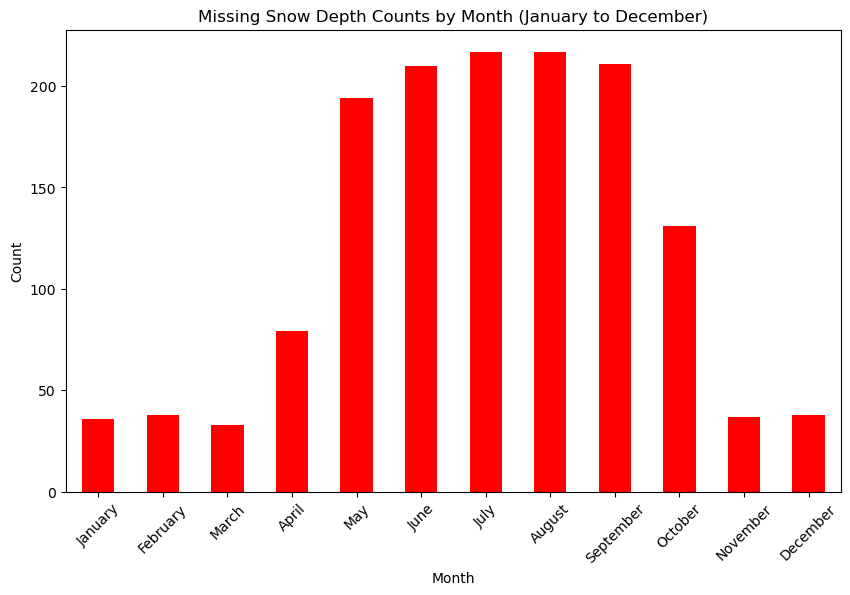

In [13]:
# Let's graph out the missing snow depth values and group them by month
missing_dates = lw_df[lw_df['snow_depth'].isnull()]['date']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing snow depth per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing snow depth counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Snow Depth Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

Perhaps try inputing the mean into all the null values for all the columns.

In [14]:
mean_snow_depth = lw_df['snow_depth'].mean()

# Impute the mean value to all null 'snow_depth' values
lw_df['snow_depth'].fillna(mean_snow_depth, inplace=True)

In [15]:
# Counting the missing Values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover         19
sunshine             0
global_radiation    19
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

Let's do it with the rest

In [16]:
# Null values for cloud cover
mean_cloud_cover = lw_df['cloud_cover'].mean()

# Impute the mean value to all null 'cloud_cover' values
lw_df['cloud_cover'].fillna(mean_cloud_cover, inplace=True)

In [17]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation    19
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [18]:
# Null values for global radiation
mean_global_radiation = lw_df['global_radiation'].mean()

# Impute the mean value to all null 'global_radiation' values
lw_df['global_radiation'].fillna(mean_global_radiation, inplace=True)

In [19]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation     0
max_temp             6
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [20]:
# Null values for max temp
mean_max_temp = lw_df['max_temp'].mean()

# Impute the mean value to all null 'max_temp' values
lw_df['max_temp'].fillna(mean_global_radiation, inplace=True)

In [21]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                 0
cloud_cover          0
sunshine             0
global_radiation     0
max_temp             0
mean_temp           36
min_temp             2
precipitation        6
pressure             4
snow_depth           0
dtype: int64

In [22]:
# Null values for mean temp
mean_mean_temp = lw_df['mean_temp'].mean()

# Impute the mean value to all null 'mean_temp' values
lw_df['mean_temp'].fillna(mean_mean_temp, inplace=True)

In [23]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            2
precipitation       6
pressure            4
snow_depth          0
dtype: int64

In [24]:
# Null values for min temp
mean_min_temp = lw_df['min_temp'].mean()

# Impute the mean value to all null 'min_temp' values
lw_df['min_temp'].fillna(mean_min_temp, inplace=True)

In [25]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       6
pressure            4
snow_depth          0
dtype: int64

In [26]:
# Null values for precipitation
mean_precipitation = lw_df['precipitation'].mean()

# Impute the mean value to all null 'precipitation' values
lw_df['precipitation'].fillna(mean_precipitation, inplace=True)

In [27]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            4
snow_depth          0
dtype: int64

In [28]:
# Null values for pressure
mean_pressure = lw_df['pressure'].mean()

# Impute the mean value to all null 'pressure' values
lw_df['pressure'].fillna(mean_pressure, inplace=True)

In [29]:
# Counting the missing values
nan_count = lw_df.isna().sum()
nan_count

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [30]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15341 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15341 non-null  float64       
 4   max_temp          15341 non-null  float64       
 5   mean_temp         15341 non-null  float64       
 6   min_temp          15341 non-null  float64       
 7   precipitation     15341 non-null  float64       
 8   pressure          15341 non-null  float64       
 9   snow_depth        15341 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


### Check for duplicates

In [31]:
number_of_duplicates = lw_df.duplicated().sum()
number_of_duplicates

0

In [32]:
lw_df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,15341,2000-01-01 00:00:00,1979-01-01 00:00:00,1989-07-02 00:00:00,2000-01-01 00:00:00,2010-07-02 00:00:00,2020-12-31 00:00:00,NaN
cloud_cover,15341.0,5.268242,0.0,4.0,6.0,7.0,9.0,2.06879
sunshine,15341.0,4.350238,0.0,0.5,3.5,7.2,16.0,4.028339
global_radiation,15341.0,118.756951,8.0,41.0,95.0,186.0,402.0,88.8432
max_temp,15341.0,15.429206,-6.2,10.5,15.0,20.3,118.756951,6.86481
mean_temp,15341.0,11.475511,-7.6,7.1,11.4,16.0,29.0,5.722981
min_temp,15341.0,7.559867,-11.8,3.5,7.8,11.8,22.3,5.326409
precipitation,15341.0,1.668634,0.0,0.0,0.0,1.6,61.8,3.737809
pressure,15341.0,101536.605594,95960.0,100920.0,101620.0,102240.0,104820.0,1049.585735
snow_depth,15341.0,0.037986,0.0,0.0,0.0,0.0,22.0,0.519373


### Visualising the variables

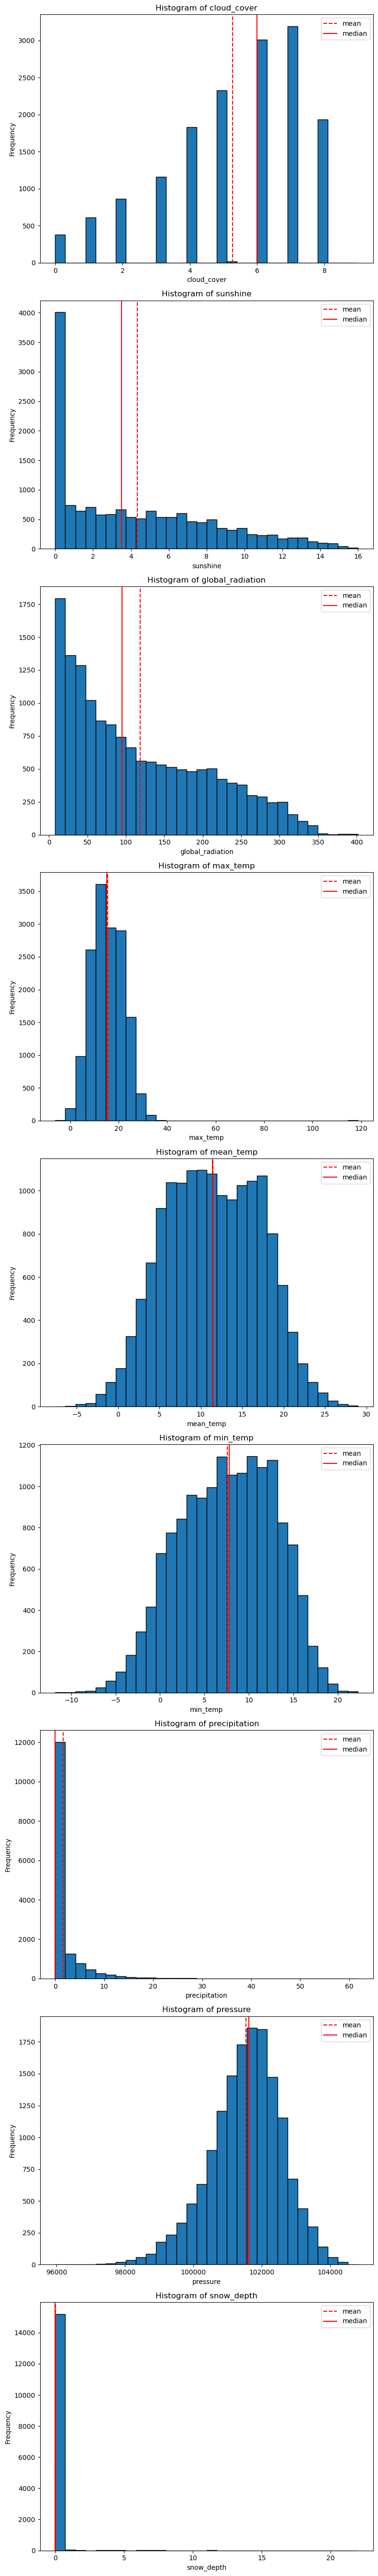

In [33]:
# Selecting numerical columns for visualization
numerical_columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Plotting histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    plt.hist(lw_df[column].dropna(), bins=30, edgecolor='black')
    plt.axvline(lw_df[column].mean(), label='mean', color='red', linestyle='--')
    plt.axvline(lw_df[column].median(), label='median', color='red')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

#### A visual of how the average values of each weather variable changes over the months from years 1979 to 2021.

In [34]:
# Creating a different df to graph
lw_graph = lw_df.copy()

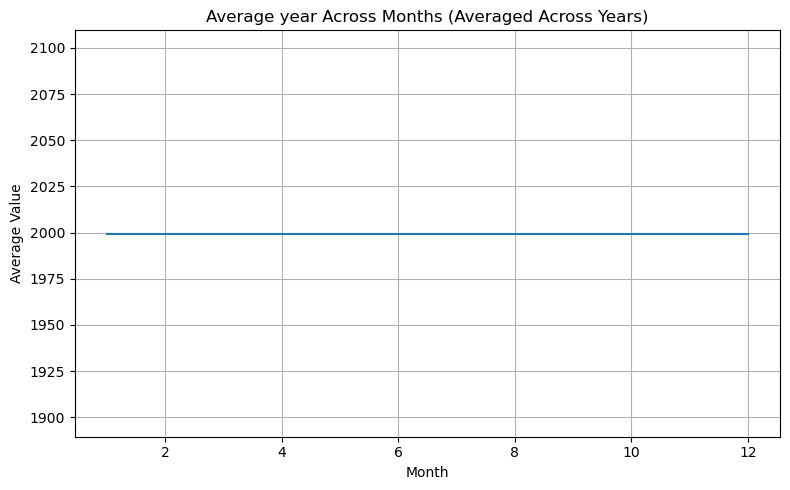

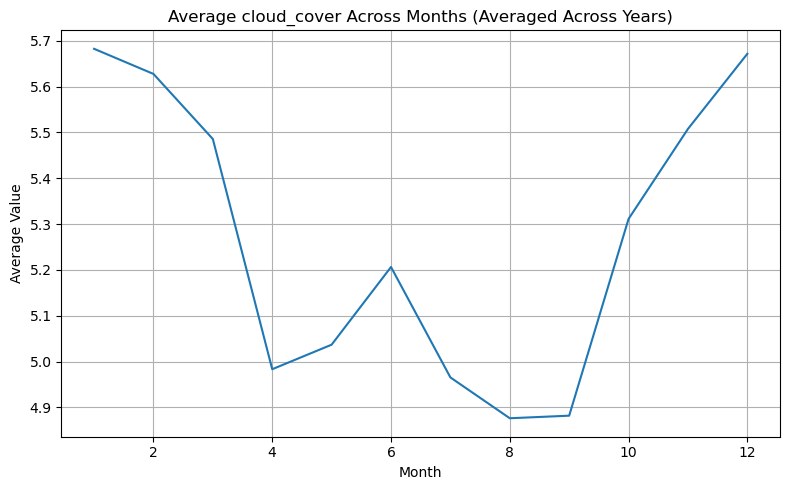

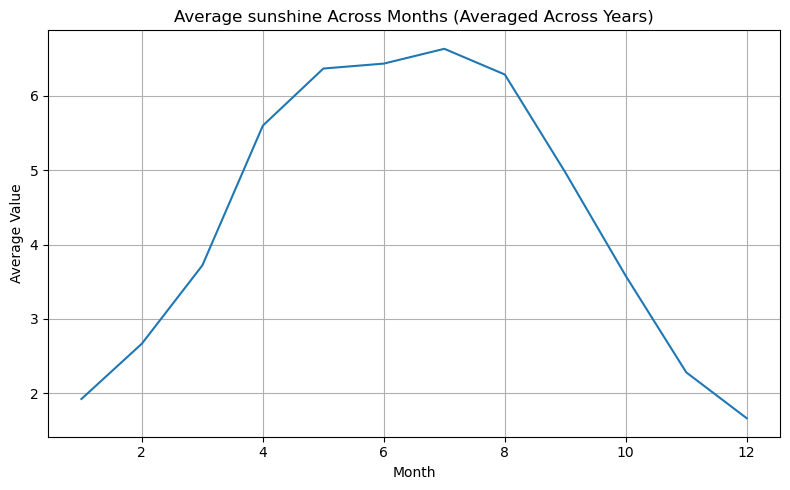

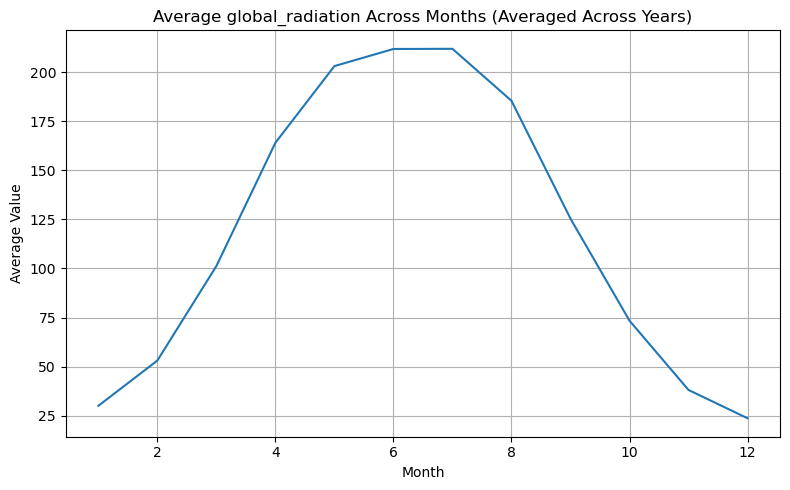

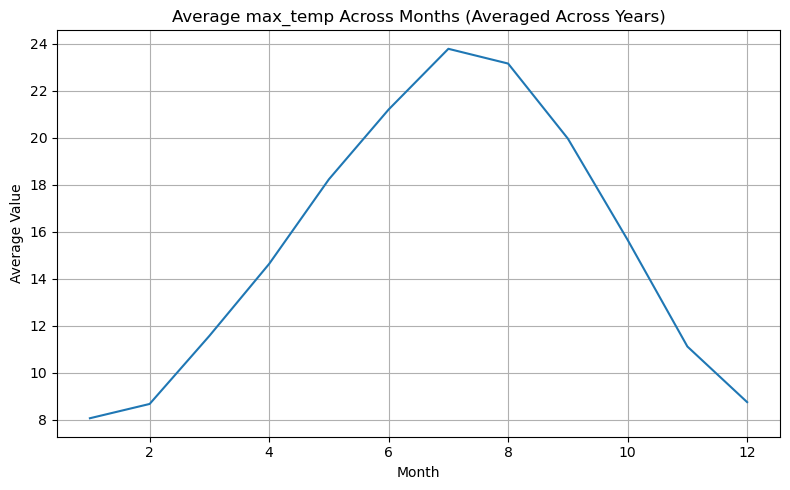

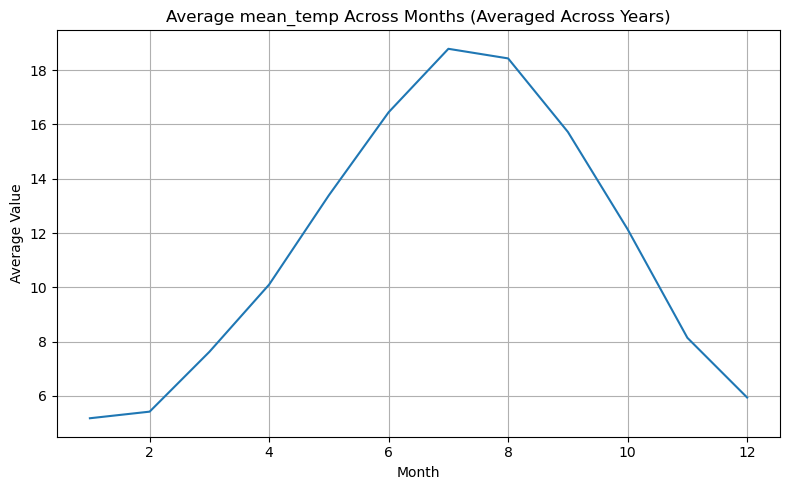

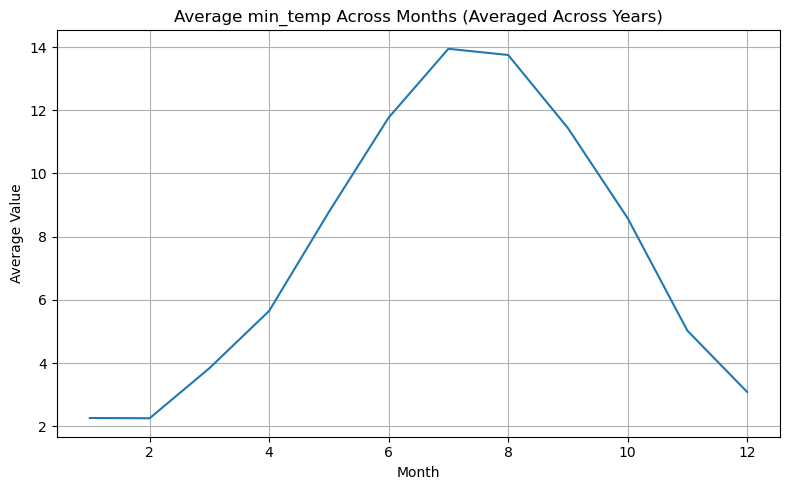

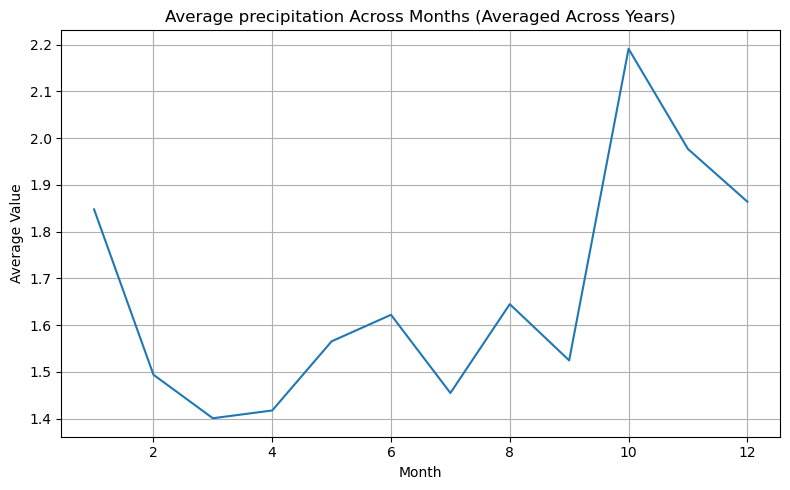

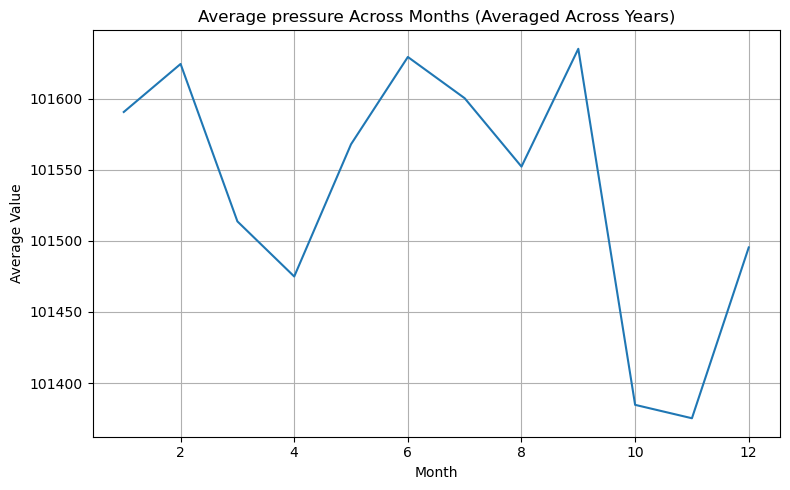

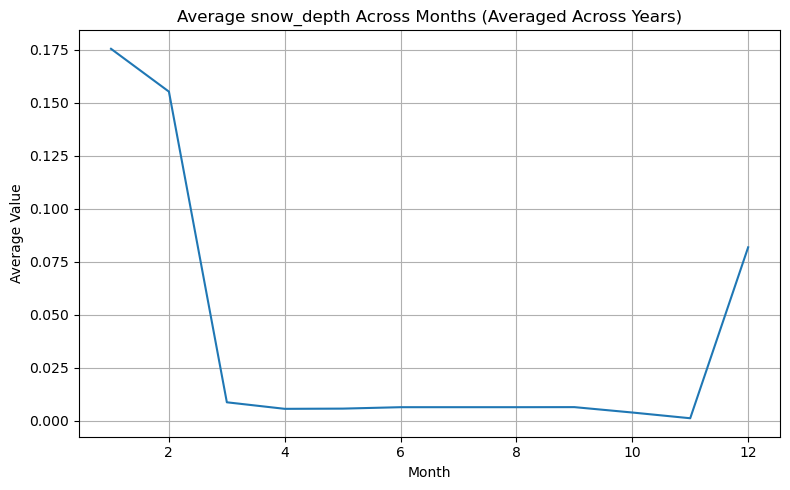

In [36]:
# Extract month and year 
lw_graph['year'] = lw_graph['date'].dt.year
lw_graph['month'] = lw_graph['date'].dt.month

# Group by year and month, then calculate the mean for each month across years
average_weather_monthly = lw_graph.groupby(['year', 'month']).mean().reset_index()

# Calculate the average across years for each month
average_across_years = average_weather_monthly.groupby('month').mean()

# Exclude the 'date' column if it exists
if 'date' in average_across_years.columns:
    average_across_years = average_across_years.drop(columns=['date'])
    
# Plot each weather variable on separate graphs
for column in average_across_years.columns:
    plt.figure(figsize=(8, 5))
    plt.plot(average_across_years.index, average_across_years[column])
    plt.title(f'Average {column} Across Months (Averaged Across Years)')
    plt.xlabel('Month')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Correlations for the different weather variables

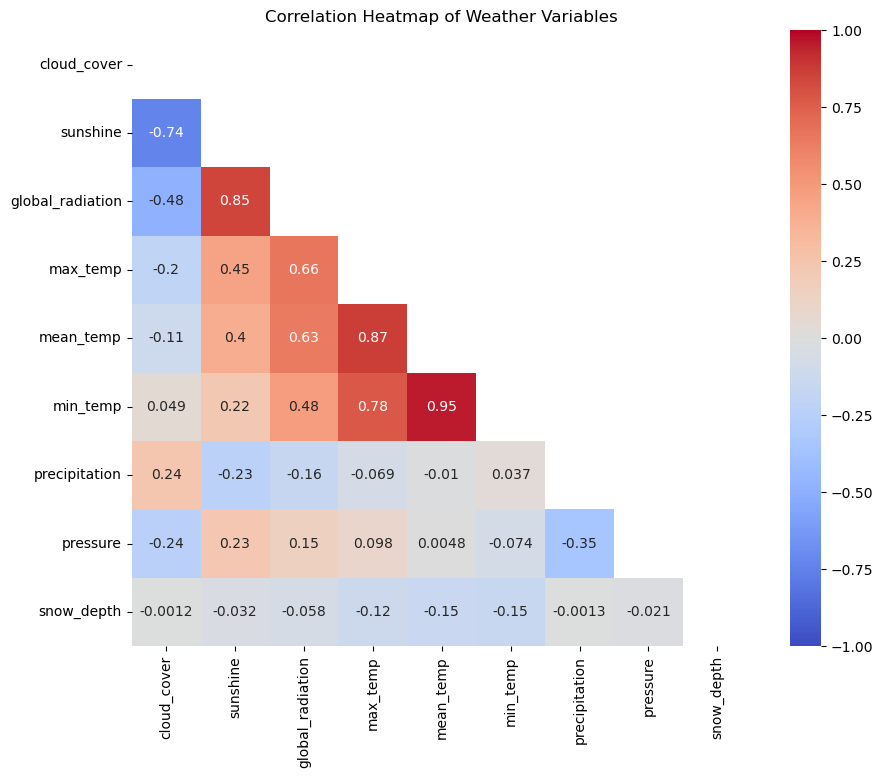

In [37]:
# Selecting weather variables for correlation analysis
weather_variables = lw_df.select_dtypes(include=['float64']).columns

# Calculating correlation matrix
correlation_matrix = lw_df[weather_variables].corr()

# Mask for the upper triangle
mask = ~np.tri(correlation_matrix.shape[0], k=-1, dtype=bool)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

Strongest correlations in this dataset seem to be the mean temp and min temp (0.95). 
Variations or fluctuations in the minimum temperature have a more immediate and direct effect on the average temperature compared to variations in the maximum temperature.

While those are positive linear correlations, a negative linear correlation to make note of would be the cloud cover and sunshine (-0.74)

Some interesting correlations to also be aware of would be between:
- Precipitation & Min temp
- Snow depth & cloud cover
- Pressure & Mean temp
- Precipiation & Snow depth

All of which provide a value extremely close to (0.00/-0.00) indicating they have no relationship with one another. 


### Checking the outliers

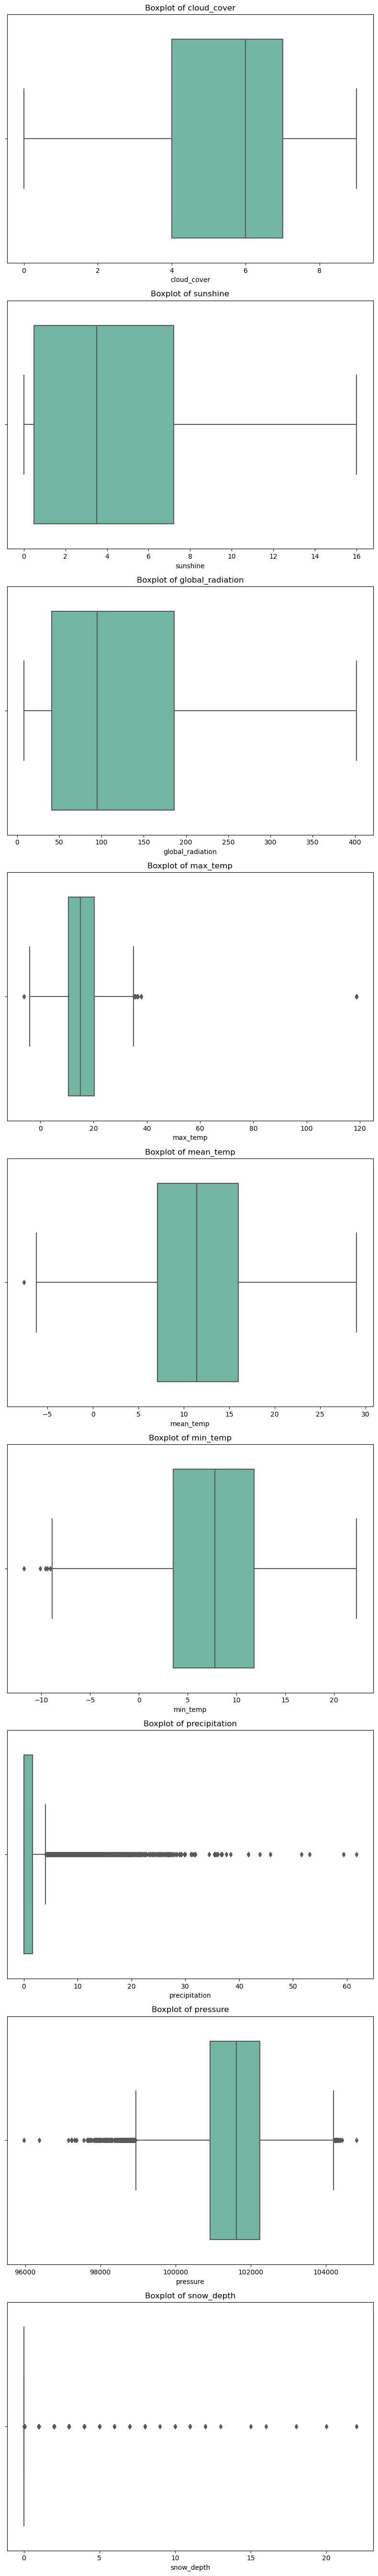

In [38]:
# Selecting weather variables for boxplot visualization
weather_variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Creating separate boxplots for each weather variable
fig, axes = plt.subplots(nrows=len(weather_variables), ncols=1, figsize=(8, 6 * len(weather_variables)))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(weather_variables):
    ax = axes[i]
    sns.boxplot(x=lw_df[variable], ax=ax, palette='Set2', showfliers=True)
    ax.set_title(f'Boxplot of {variable}')
    ax.set_xlabel(variable)

plt.tight_layout()
plt.show()

To keep note:

`max_temp` has a value that comes close to 120 degrees. This is probably an error in either the instrument/the collection of the data, and should most likely be viewed as such. 

Other outliers like this may be in the dataset and might have an impact at a later stage

## 2. Run a Linear regression model on `mean_temp`

There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**


### Linearity

### Visualising the different variables with respect to `mean_temp`

In [39]:
# importing this package to fit and explore our linear regression model
import statsmodels.api as sm

In [40]:
weather_variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
# Independent variables
X = lw_df[weather_variables]

# Dependent variable
y = lw_df['mean_temp']

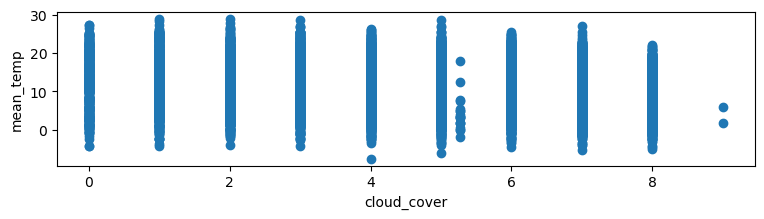

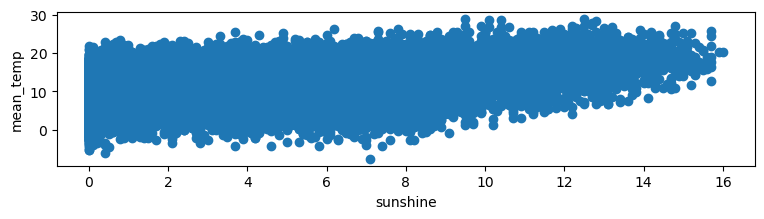

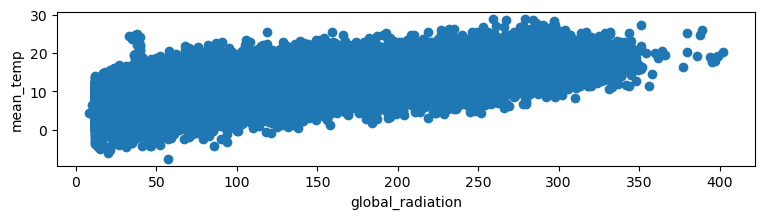

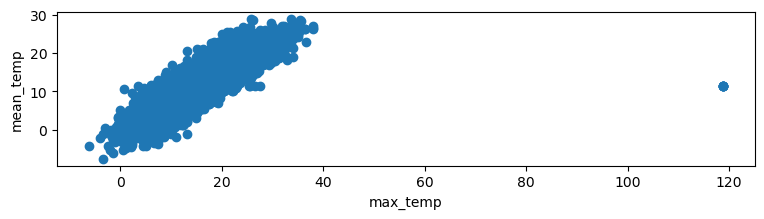

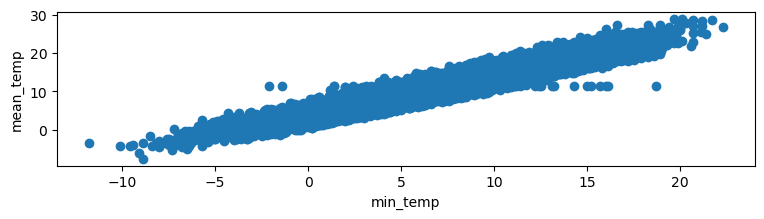

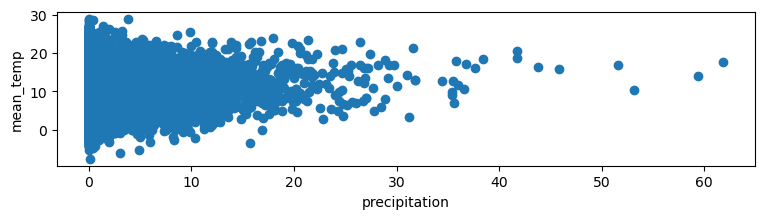

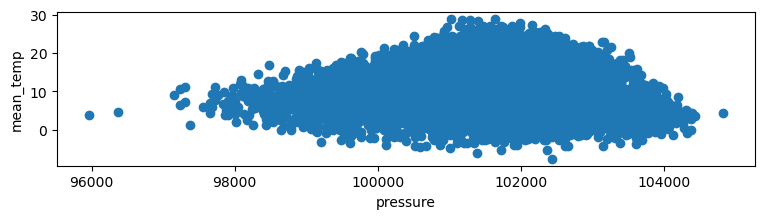

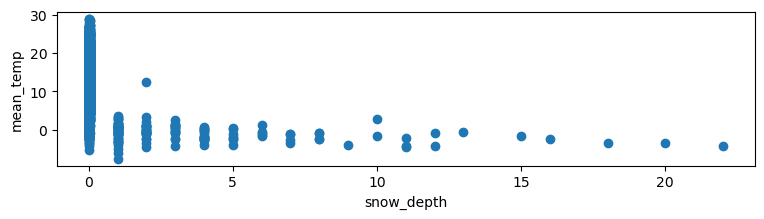

In [41]:
# Using a loop to make 9 plots 
for col in X.columns: 
    plt.figure(figsize=(9, 2))
    plt.scatter(X[col], y)
    plt.ylabel('mean_temp')
    plt.xlabel(col)
    plt.show()

### Addressing multicollinearity using VIF (Variance Inflation Factor)

In [42]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X

X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

cloud_cover         2.731748
sunshine            7.719940
global_radiation    6.466066
max_temp            3.659676
min_temp            3.011739
precipitation       1.178422
pressure            1.214686
snow_depth          1.025257
dtype: float64

To summarize:
- `sunshine` and `global_radiation` exhibit the highest multicollinearity among the variables.
- `cloud_cover`, `max_temp`, and `min_temp` show moderate levels of correlation with other predictors.
- `precipitation`, `pressure`, and `snow_depth` have relatively lower levels of multicollinearity among the variables in the model.

### Correlations of all variables with respect to `mean_temp`

In [43]:
cal_corr = lw_df.corr()
cal_corr['mean_temp'].sort_values()

snow_depth         -0.147051
cloud_cover        -0.110273
precipitation      -0.010455
pressure            0.004758
date                0.098959
sunshine            0.396130
global_radiation    0.633862
max_temp            0.870106
min_temp            0.954532
mean_temp           1.000000
Name: mean_temp, dtype: float64

To summarize:
- `mean_temp` is strongly positively correlated with `min_temp`, `max_temp`, `global_radiation`, and moderately with `sunshine`. This suggests that as `mean_temp` increases, these variables tend to increase as well.
- The weak correlations with `pressure`, `precipitation`, `cloud_cover`, and `snow_depth` indicate a lack of strong linear relationship with `mean_temp`. Additionally, the latter three, show a negative relationship indicating  that as `mean_temp` rises, they will decrease. 

### Various Models

### Model 1

Let's try the model with all the variables

In [44]:
# add constant
X_withconstant_1 = sm.add_constant(X)

In [45]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant_1)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 5.615e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:58:59   Log-Likelihood:                -22365.
No. Observations:               15341   AIC:                         4.475e+04
Df Residuals:                   15332   BIC:                         4.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.3747      0.897     -5.993      0.000      -7.132      -3.617
cloud_cover         -0.0903      0.007    -13.457      0.000      -0.103      -0.077
sunshine             0.0425      0.006      7.336      0.000       0.031       0.054
global_radiation     0.0066      0.000     27.352      0.000       0.006       0.007
max_temp             0.1719      0.002     73.443      0.000       0.167       0.176
min_temp             0.7957      0.003    290.863      0.000       0.790       0.801
precipitation        0.0188      0.002      7.710      0.000       0.014       0.024
pressure          7.548e-05   8.82e-06      8.560      0.000    5.82e-05    9.28e-05
snow_depth          -0.0480      0.016     -2.931      0.003      -0.080      -0.016
==============================================================================
Omnibus:                    13378.604   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4431759.290
Skew:                          -3.322   Prob(JB):                         0.00
Kurtosis:                      86.000   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values, we can gather that all variables are siginificant in predicting `mean_temp`. Additionally, some of these variables provide a strong multicollineraity, hence we'd need to drop some to help improve our model.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.967 |

### Model 2

Due to it being highly colinear, let's try it without `min_temp`

In [46]:
# drop columns 
X_new = X.drop(columns=['min_temp'])

In [47]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression2 = sm.OLS(y, X_new)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results2 = myregression2.fit()

# Looking at the summary
myregression_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     7992.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:59:06   Log-Likelihood:                -36744.
No. Observations:               15341   AIC:                         7.350e+04
Df Residuals:                   15333   BIC:                         7.356e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.9293      2.265     14.541      0.000      28.490      37.368
cloud_cover          0.2576      0.017     15.286      0.000       0.225       0.291
sunshine            -0.0886      0.015     -6.010      0.000      -0.117      -0.060
global_radiation     0.0153      0.001     25.215      0.000       0.014       0.017
max_temp             0.6348      0.004    144.958      0.000       0.626       0.643
precipitation        0.0355      0.006      5.699      0.000       0.023       0.048
pressure            -0.0003   2.22e-05    -15.107      0.000      -0.000      -0.000
snow_depth          -0.5121      0.042    -12.313      0.000      -0.594      -0.431
==============================================================================
Omnibus:                    18876.334   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14745359.649
Skew:                          -6.010   Prob(JB):                         0.00
Kurtosis:                     154.406   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The removal of `min_temp`, seems to have decreased the R-squared value, but we have fewer variables in our model, which means it will be much simpler to interpret and explain! It is also important to note that the coefficients for the variables have changed over each iteration of backward selection (they have mainly increased), with the exception of `sunshine`, whose coefficient has decreased. 

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.967 |
| 2 | All minus min_temp                         | 0.785 |

### Model 3

In [48]:
X_ammend = X.drop(columns=['min_temp', 'global_radiation', 'sunshine'])

In [49]:
X_ammend 

,const,cloud_cover,max_temp,precipitation,pressure,snow_depth
0,1.0,2.0,2.3,0.4,101900.0,9.000000
1,1.0,6.0,1.6,0.0,102530.0,8.000000
2,1.0,5.0,1.3,0.0,102050.0,4.000000
3,1.0,8.0,-0.3,0.0,100840.0,2.000000
4,1.0,6.0,5.6,0.0,102250.0,1.000000
...,...,...,...,...,...,...
15336,1.0,1.0,7.5,2.0,98000.0,0.037986
15337,1.0,7.0,3.6,0.2,97370.0,0.037986
15338,1.0,7.0,4.1,0.0,98830.0,0.037986
15339,1.0,6.0,5.6,0.0,100200.0,0.037986


In [50]:
X_withconstant_3 = sm.add_constant(X_ammend)

In [51]:
# add constant
X_withconstant_3 = sm.add_constant(X_ammend)
# run model again
# 1. Instantiate Model
myregression3 = sm.OLS(y, X_withconstant_3)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results3 = myregression3.fit()

# Looking at the summary
myregression_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:59:11   Log-Likelihood:                -37314.
No. Observations:               15341   AIC:                         7.464e+04
Df Residuals:                   15335   BIC:                         7.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.2222      2.348     14.998      0.000      30.619      39.825
cloud_cover       0.1352      0.011     11.830      0.000       0.113       0.158
max_temp          0.7355      0.003    220.360      0.000       0.729       0.742
precipitation     0.0253      0.006      3.931      0.000       0.013       0.038
pressure         -0.0004    2.3e-05    -15.340      0.000      -0.000      -0.000
snow_depth       -0.4865      0.043    -11.274      0.000      -0.571      -0.402
==============================================================================
Omnibus:                    22136.800   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32161665.377
Skew:                          -8.076   Prob(JB):                         0.00
Kurtosis:                     226.727   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                     | 0.967 |
| 2 | All minus min_temp                                      | 0.785 |
| 3 | All minus min_temp, global_radiation, sunshine          | 0.768 |

### Model 4

In [52]:
X_ammend_two = X.drop(columns=['min_temp', 'global_radiation', 'sunshine', "pressure", "snow_depth"])

In [56]:
# add constant
X_withconstant_4 = sm.add_constant(X_ammend_two)
# run model again
# 1. Instantiate Model
myregression4 = sm.OLS(y, X_withconstant_4)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results4 = myregression4.fit()

# Looking at the summary
myregression_results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:59:28   Log-Likelihood:                -37490.
No. Observations:               15341   AIC:                         7.499e+04
Df Residuals:                   15337   BIC:                         7.502e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8802      0.088     -9.949      0.000      -1.054      -0.707
cloud_cover       0.1670      0.011     14.647      0.000       0.145       0.189
max_temp          0.7377      0.003    220.330      0.000       0.731       0.744
precipitation     0.0562      0.006      9.067      0.000       0.044       0.068
==============================================================================
Omnibus:                    21901.277   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30333815.852
Skew:                          -7.913   Prob(JB):                         0.00
Kurtosis:                     220.267   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus min_temp                                                            | 0.785 |
| 3 | All minus min_temp, global_radiation, sunshine                                | 0.768 |
| 4 | cloud_cover, max_temp, precipitation                                          | 0.763 |

We seemed to have removed the strong multicollinearity but our $R$2 is still low

### Model 5

In [57]:
X_ammend_three = X.drop(columns=['sunshine', 'global_radiation', "pressure", "precipitation"])

In [58]:
X_ammend_three

,const,cloud_cover,max_temp,min_temp,snow_depth
0,1.0,2.0,2.3,-7.5,9.000000
1,1.0,6.0,1.6,-7.5,8.000000
2,1.0,5.0,1.3,-7.2,4.000000
3,1.0,8.0,-0.3,-6.5,2.000000
4,1.0,6.0,5.6,-1.4,1.000000
...,...,...,...,...,...
15336,1.0,1.0,7.5,7.6,0.037986
15337,1.0,7.0,3.6,-1.3,0.037986
15338,1.0,7.0,4.1,1.1,0.037986
15339,1.0,6.0,5.6,-0.1,0.037986


In [59]:
# add constant
X_withconstant_5 = sm.add_constant(X_ammend_three)
# run model again
# 1. Instantiate Model
myregression5 = sm.OLS(y, X_withconstant_5)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results5 = myregression5.fit()

# Looking at the summary
myregression_results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 9.233e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:59:35   Log-Likelihood:                -23814.
No. Observations:               15341   AIC:                         4.764e+04
Df Residuals:                   15336   BIC:                         4.768e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2817      0.039     83.349      0.000       3.205       3.359
cloud_cover    -0.2560      0.005    -52.969      0.000      -0.265      -0.247
max_temp        0.2235      0.002     96.760      0.000       0.219       0.228
min_temp        0.8062      0.003    275.037      0.000       0.800       0.812
snow_depth     -0.0313      0.018     -1.741      0.082      -0.067       0.004
==============================================================================
Omnibus:                    16377.666   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9203838.817
Skew:                          -4.647   Prob(JB):                         0.00
Kurtosis:                     122.635   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus min_temp                                                            | 0.785 |
| 3 | All minus min_temp, global_radiation, sunshine                                | 0.768 |
| 4 | cloud_cover, max_temp, precipitation                                          | 0.763 |
| 5 | All minus global_radiation, sunshine, pressure, precipitation                 | 0.960 |

Our $R$2 has improved alot. However,`snow_depth` still seems to show a slight insiginficance in predicting `mean_temp`. 

### Model 6

In [60]:
X_ammend_four = X.drop(columns=['sunshine', 'global_radiation', 'snow_depth', 'precipitation', 'pressure'])

In [61]:
X_ammend_four

,const,cloud_cover,max_temp,min_temp
0,1.0,2.0,2.3,-7.5
1,1.0,6.0,1.6,-7.5
2,1.0,5.0,1.3,-7.2
3,1.0,8.0,-0.3,-6.5
4,1.0,6.0,5.6,-1.4
...,...,...,...,...
15336,1.0,1.0,7.5,7.6
15337,1.0,7.0,3.6,-1.3
15338,1.0,7.0,4.1,1.1
15339,1.0,6.0,5.6,-0.1


In [62]:
# add constant
X_withconstant_6 = sm.add_constant(X_ammend_four)
# run model again
# 1. Instantiate Model
myregression6 = sm.OLS(y, X_withconstant_6)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results6 = myregression6.fit()

# Looking at the summary
myregression_results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mean_temp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.231e+05
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:59:41   Log-Likelihood:                -23816.
No. Observations:               15341   AIC:                         4.764e+04
Df Residuals:                   15337   BIC:                         4.767e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2773      0.039     83.404      0.000       3.200       3.354
cloud_cover    -0.2560      0.005    -52.976      0.000      -0.266      -0.247
max_temp        0.2235      0.002     96.753      0.000       0.219       0.228
min_temp        0.8066      0.003    276.298      0.000       0.801       0.812
==============================================================================
Omnibus:                    16378.487   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9203604.543
Skew:                          -4.647   Prob(JB):                         0.00
Kurtosis:                     122.633   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                                                           | 0.967 |
| 2 | All minus min_temp                                                            | 0.785 |
| 3 | All minus min_temp, global_radiation, sunshine                                | 0.768 |
| 4 | All minus min_temp, global_radiation, sunshine, pressure, snow_depth          | 0.763 |
| 5 | All minus global_radiation, sunshine, pressure, snow_depth                    | 0.960 |
| 6 | Cloud_cover, max_temp, min_temp                                               | 0.960 |

After trying differnt combinations of variable one by one, we were able to achieve $R^2$ of 0.960. This includes only 3 independent variables out of 8 and additionally does not have strong multicollinearity affecting the model.

This model has the best performance ($R^2$) and the easiest interpretability (i.e., fewest variables), so we'll conlcude that this is our best fitting model. 

### Residuals

### Visual representation of the residuals of various models 

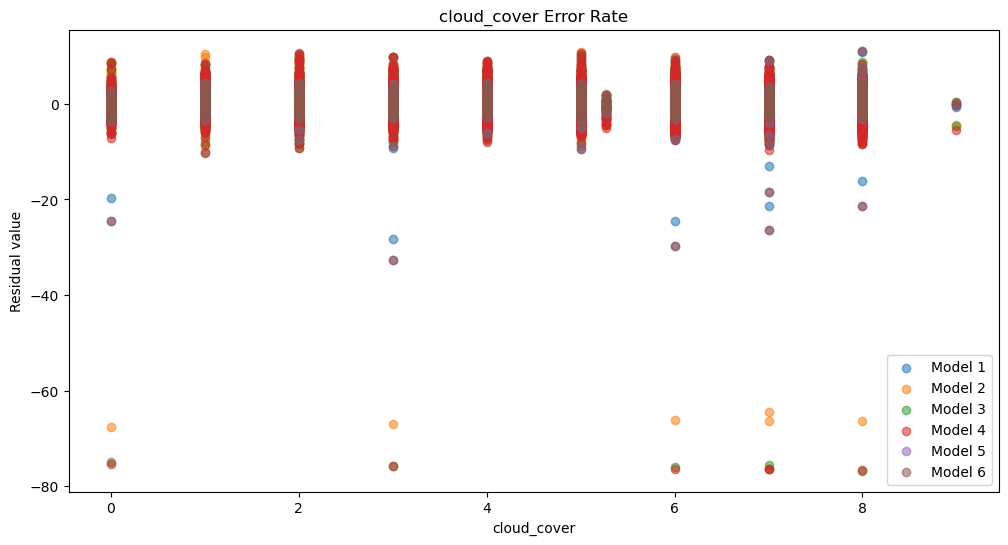

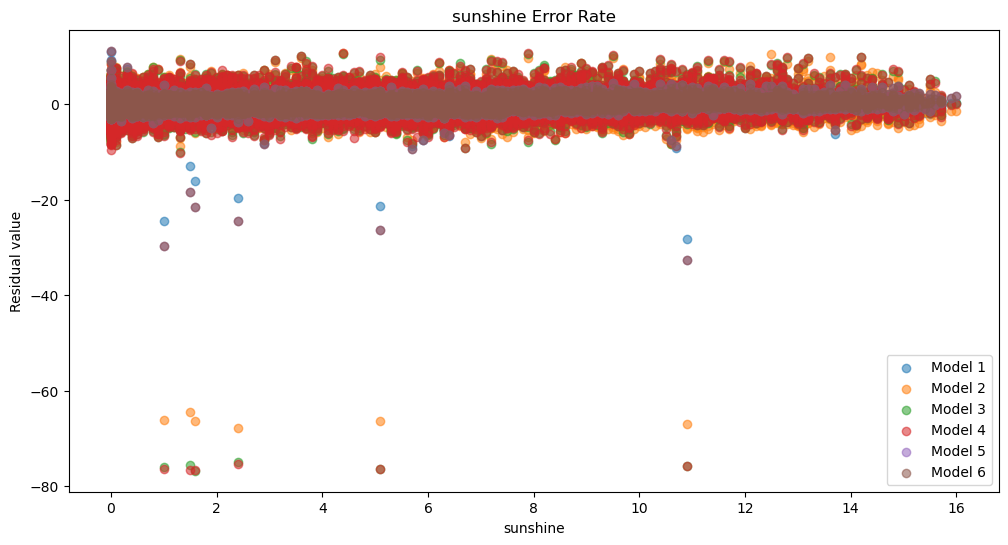

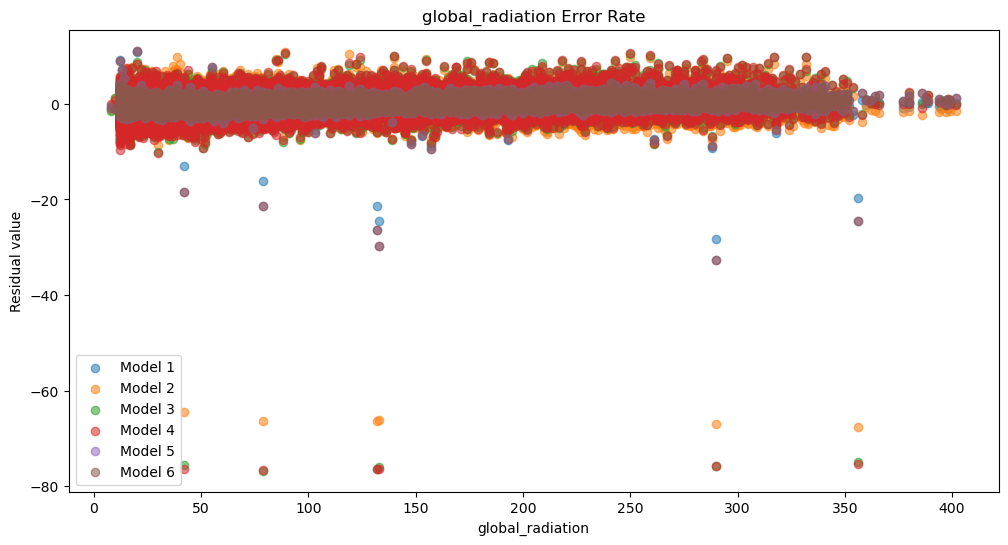

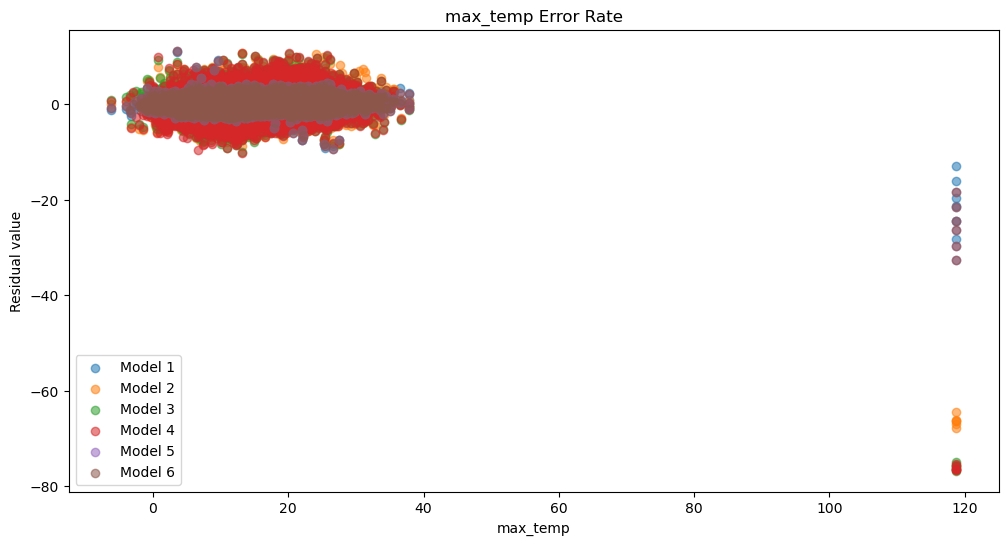

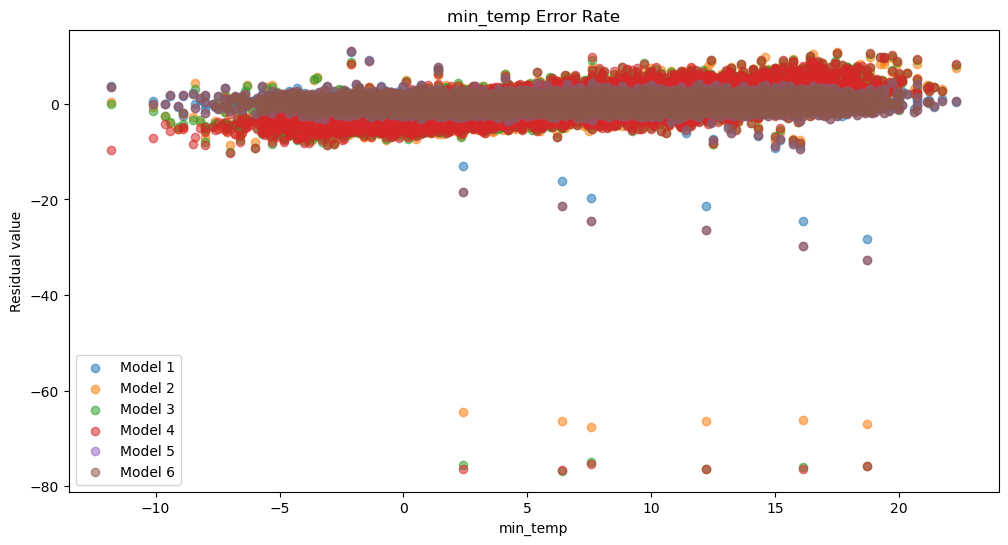

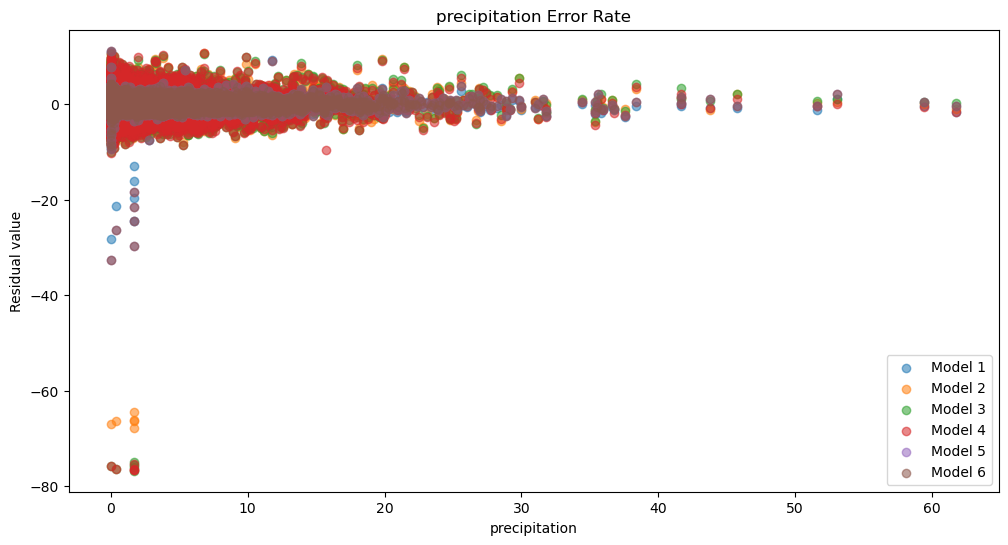

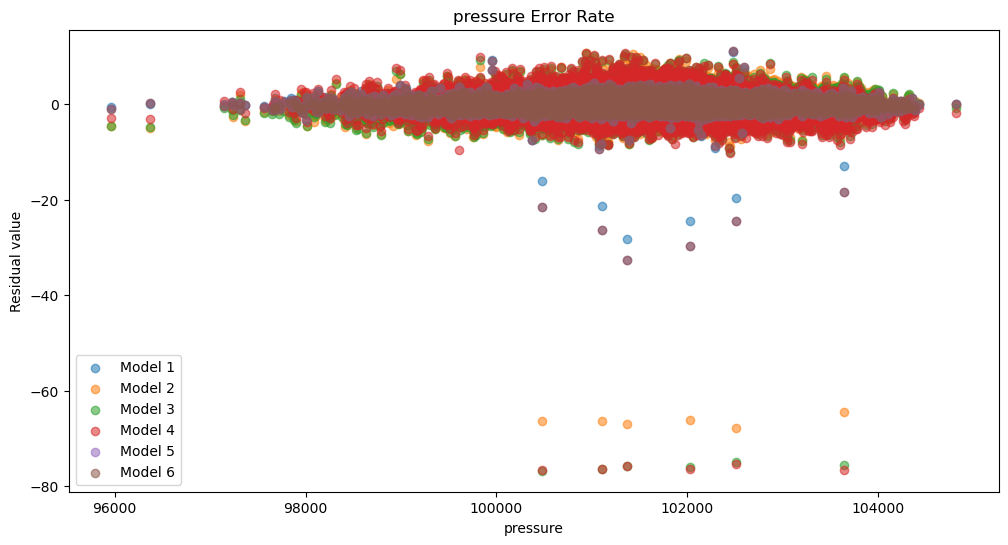

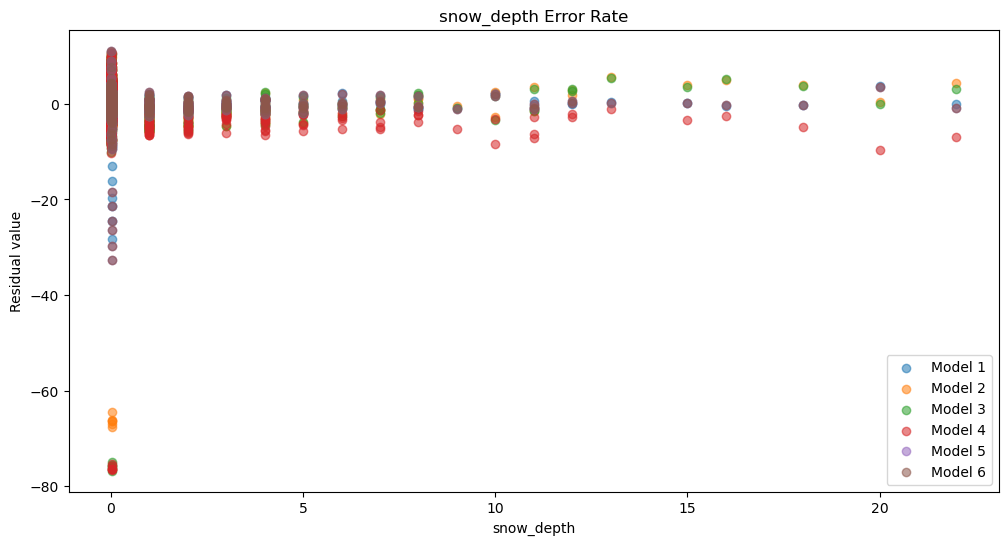

In [63]:
for column in X.columns[1:]:
    plt.figure(figsize = (12,6))
    plt.scatter(X[column], myregression_results.resid,label="Model 1", alpha=0.55)
    plt.scatter(X[column], myregression_results2.resid,label="Model 2", alpha=0.55)
    plt.scatter(X[column], myregression_results3.resid,label="Model 3", alpha=0.55)
    plt.scatter(X[column], myregression_results4.resid,label="Model 4", alpha=0.55)
    plt.scatter(X[column], myregression_results5.resid,label="Model 5", alpha=0.55)
    plt.scatter(X[column], myregression_results5.resid,label="Model 6", alpha=0.55)
    plt.xlabel(f"{column}")
    plt.ylabel("Residual value")
    plt.legend()
    plt.title(f"{column}" + " Error Rate")
    plt.show()

In the context of the regression analysis, the residuals above showcase the difference between the observed value of the dependent variable, `mean_temp`, and the values predicted by the regression model.This difference is what we are referring to as "Error". 
A positive residual indicates that the actual observed value is higher than the predicted value, while a negative residual means the observed value is lower than predicted.

The models seem to do a decent job in predicting values as the majority of points tend to hover around/close to a residual value of 0. However, there is a decent number of outliers evident, especially the negative values, ranging as far as -80. This seems to indicate the model overestimates some values by a large margin. 

Heteroscedasticity is pretty evident in `cloud_cover` & `snow_depth`. While not as prominent, the other variables also show a little spread/variance in their predictions. It should also be important to note `max_temp` and the one outlier we'd seen earlier with the box plots. This specific point shows the greatest spread. 

### Shapiro-Wilk Test for all models

In [64]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro-Wilk Test for Model {idx}: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

Shapiro-Wilk Test for Model 1: Statistic=0.8643577694892883, p-value=0.0
Shapiro-Wilk Test for Model 2: Statistic=0.8137407898902893, p-value=0.0
Shapiro-Wilk Test for Model 3: Statistic=0.7645570635795593, p-value=0.0
Shapiro-Wilk Test for Model 4: Statistic=0.7685647010803223, p-value=0.0
Shapiro-Wilk Test for Model 5: Statistic=0.8339942693710327, p-value=0.0
Shapiro-Wilk Test for Model 6: Statistic=0.8340302109718323, p-value=0.0


C:\Users\mitth\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test statistic measures how closely the residuals in each model's dataset resemble a normal distribution. The values range between 0 and 1, where values closer to 1 indicate the data is more normally distributed.

The p-value indicates the strength of evidence against the null hypothesis (the assumption of normality). A smaller p-value (typically below a significance level like 0.05) suggests stronger evidence to reject the null hypothesis in favor of the alternative hypothesis, indicating departure from normality.

$$ H_0 : \text{Data is normally distributed}  \quad vs. \quad H_1 : \text{Data is not normally distributed} $$

The above Shapiro-Wilk test indicates that all 6 models reject the null hypothesis and are not normally distributed. 

### Q-Q plots

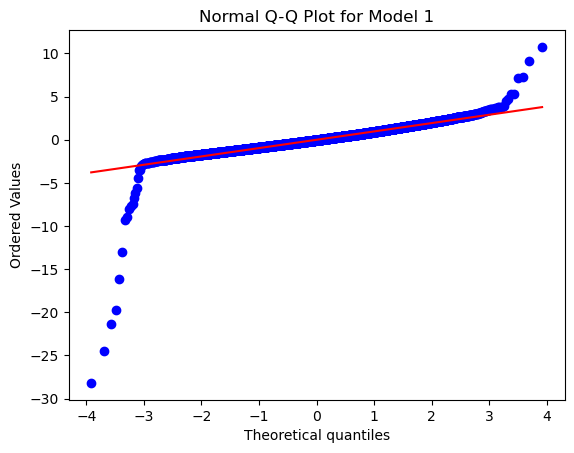

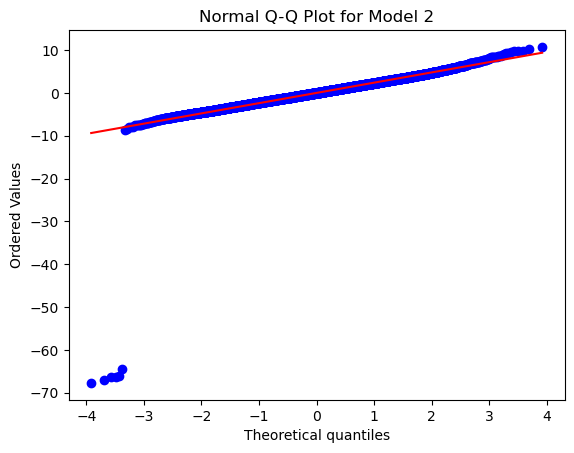

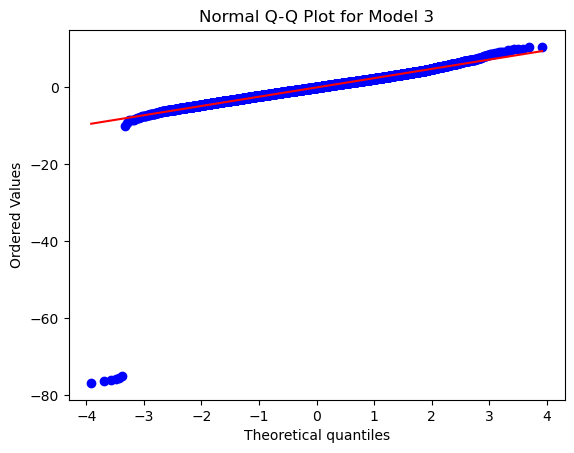

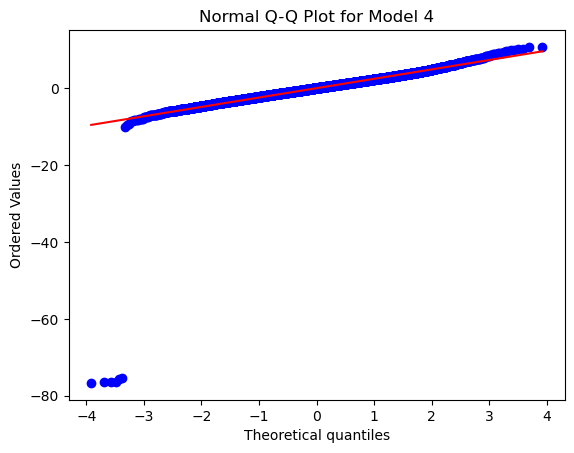

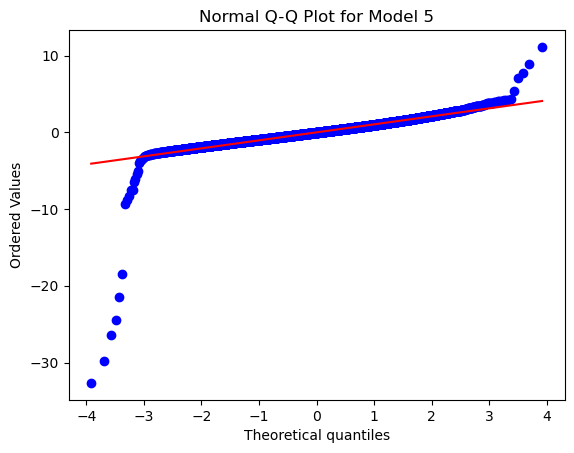

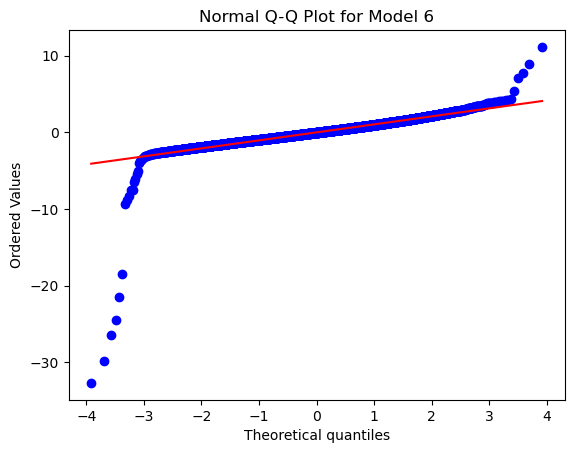

In [65]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    plt.figure()
    stats.probplot(model.resid, dist="norm", plot=plt)
    plt.title(f"Normal Q-Q Plot for Model {idx}")
    plt.show()

Most of the residuals in all six models falling along the red line indicate a relatively normal distribution for the central range of the residuals. This suggests that the majority of the data behaves somewhat normally

The heavy negative tail suggests that in the extreme lower end of residuals, there might be values lower than what a normal distribution would predict. This deviation from normality could indicate outliers or specific patterns in the data that the models fail to capture accurately

### Homoscedasticity

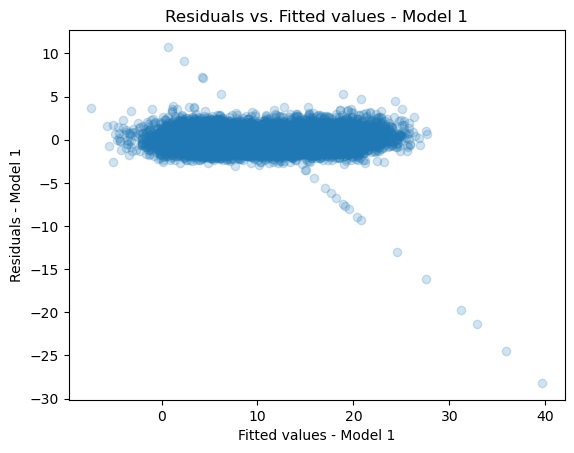

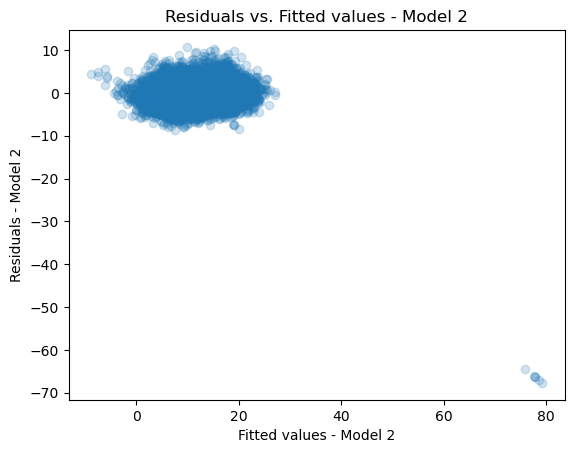

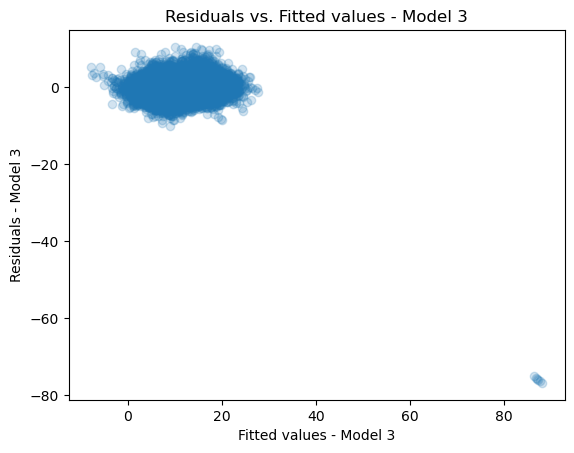

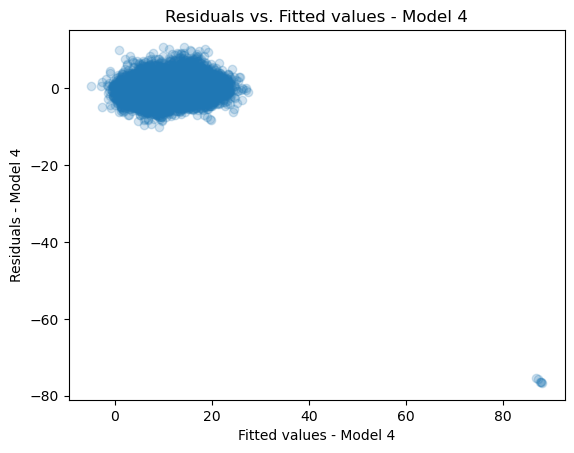

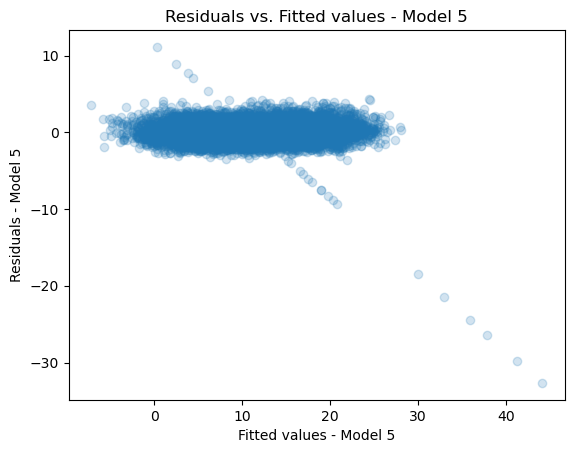

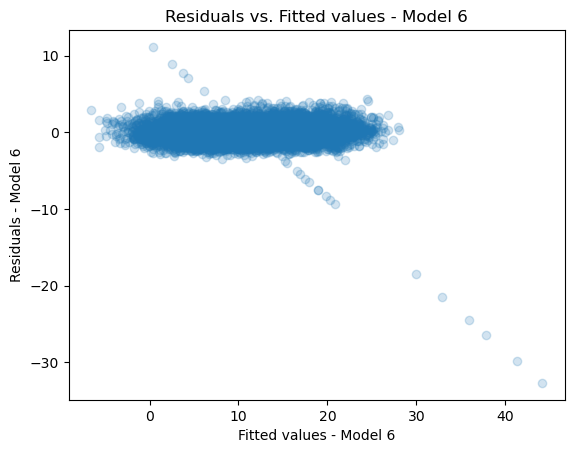

In [66]:
models = [myregression_results, myregression_results2, myregression_results3, myregression_results4, myregression_results5, myregression_results6]

for idx, model in enumerate(models, start=1):
    plt.figure()
    plt.scatter(model.fittedvalues, model.resid, alpha=0.2)
    plt.xlabel(f'Fitted values - Model {idx}')
    plt.ylabel(f'Residuals - Model {idx}')
    plt.title(f'Residuals vs. Fitted values - Model {idx}')
    plt.show()

## 3. Conclusion

We'd seen earlier on that the variable `min_temp` has the highest collinearity with our predictor `mean_temp`. This is further validated in the impact it has on the $R^2$ in Models 2-4 when it's excluded from the respective models. 

Homoscedasticity is seen generally true for most of the data however, the outliers that are there, can be extreme. These deviations suggest areas where the model might underperform, especially if the spread of residuals widens or concentrates at certain predicted values. We see examples of overestimation by the models specifically with `cloud_cover` & `snow_depth`.

The question I am hoping to address with this dataset is to best accurately predict future `mean_temp`. Addressing and refining these outliers will help in providing a larger strength in accuracy. Perhaps the usage of other models may help in this. 